# Data Generator
These functions are meant to generate JSON objects that can be used by the front end or a better structure of the original property data.

### Imports
`import csv`

Used to work with the csv file.

`from tqdm import tqdm`

Used to measure progress on data processing

`import json`

Used to work with json data

`import matplotlib.pyplot as plt`

Used to build plots and figures

`import numpy as np`

Used with `matplotlib`

In [1]:
import csv
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
import numpy as np

### Landlord Count
Goes through `opa_properties_public.csv`, counts the unique landlords and properties in the data set

In [2]:
def landlord_count(source, output):
    landlords = {}

    with open(source, mode="r") as csv_file:
        csv_reader = csv.DictReader(csv_file)
        line_count = 0
        for row in tqdm(csv_reader, total=581456):
            if line_count == 0:
                line_count += 1
            if row["owner_1"] not in landlords.keys():
                landlords[row["owner_1"].strip()] = 1
                line_count += 1
            else:
                try:
                    landlord_prop_count = landlords[row["owner_1"].strip()]
                    landlords[row["owner_1"].strip()] = landlord_prop_count + 1
                except:
                    print(row["owner_1"].strip(), "is missing a count.")
                line_count += 1

    landlord_count = len(landlords)
    print("There are ", line_count, "properties in this data set.")
    print("There are ", landlord_count, "unique owner_1's.")

    sorted_landlords = sorted(landlords.items(), key=lambda x: x[1], reverse=True)
    with open(output, 'w') as file:
        file.write(json.dumps(sorted_landlords))

In [3]:
landlord_count('./data_sets/opa_properties_public.csv', './data_sets/unique_landlords.json')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 581417/581456 [00:10<00:00, 57346.41it/s]


There are  581418 properties in this data set.
There are  431506 unique owner_1's.


### JSON Creator
This function creates a formatted object out of the `opa_properties_public.csv` file. This will not do fuzzy string matching or anything else like that. Use `data_cleaning.ipynb` for that. This function should only really be used if you need to create your first JSON.


In [4]:
def json_creator(source, output):
    data = {}
    with open(source, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        line_count = 0
        for row in tqdm(csv_reader, total=581456):
            if line_count != 0: # The first iteration needs too ignore the csv headers
                if row["owner_1"].strip() not in data.keys():
                    address = row['location'].strip()  # So it makes more sense

                    data[row["owner_1"].strip()] = {
                        'total_properties': 1,
                        'properties': {
                            address: {
                                'location': [row['lat'].strip(), row['lng'].strip()],
                                'category': row['category_code_description'].strip(),
                                'owner_2': row['owner_2'].strip(),
                                'sale_date': row['sale_date'].strip(),
                                'sale_price': row['sale_price'].strip(),
                                'year_built': row['year_built'].strip(),
                                'year_built_estimate': row['year_built_estimate'].strip(),
                                'recording_date': row['recording_date'],
                                'zip_code': row['zip_code']
                            }
                        }
                    }
                else:
                    # Setting the data to var names for easier reading
                    owner_1 = data[row['owner_1'].strip()]
                    lat = row['lat'].strip()
                    long = row['lng'].strip()
                    category_code_description = row['category_code_description'].strip()
                    owner_2 = row['owner_2'].strip()
                    sale_date = row['sale_date'].strip()
                    sale_price = row['sale_price'].strip()
                    year_built = row['year_built'].strip()
                    year_built_estimate = row['year_built_estimate'].strip()
                    recording_date = row['recording_date']
                    zip_code = row['zip_code']

                    # Update and add values
                    owner_1['total_properties'] += 1
                    owner_1['properties'][row['location']] = {
                                'location': [lat, long],
                                'category': category_code_description,
                                'owner_2': owner_2,
                                'sale_date': sale_date,
                                'sale_price': sale_price,
                                'year_built': year_built,
                                'year_built_estimate': year_built_estimate,
                                'recording_date': recording_date,
                                'zip_code': zip_code
                            }
            line_count += 1

    with open(output, 'w') as file:
        file.write(json.dumps(data))

In [5]:
json_creator('./data_sets/opa_properties_public.csv', './data_sets/landlords_and_properties.json')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 581417/581456 [00:15<00:00, 37513.48it/s]


### Landlord JSON Creator
This function creates a dictionary of `owner_1`'s and how many properties they own.

In [6]:
def landlord_json_creator(source, output):
    landlords = {}

    with open(source, mode="r") as csv_file:
        csv_reader = csv.DictReader(csv_file)
        line_count = 0
        for row in tqdm(csv_reader, total=581456):
            if line_count == 0:
                line_count += 1
            if row["owner_1"] not in landlords.keys():
                landlords[row["owner_1"].strip()] = 1
                line_count += 1
            else:
                try:
                    landlord_prop_count = landlords[row["owner_1"].strip()]
                    landlords[row["owner_1"].strip()] = landlord_prop_count + 1
                except:
                    print(row["owner_1"].strip(), "is missing a count.")
                line_count += 1
        sorted_landlords = sorted(landlords.items(), key=lambda x: x[1], reverse=True)
    with open(output, 'w') as file:
        file.write(json.dumps(sorted_landlords))

In [7]:
landlord_json_creator('./data_sets/opa_properties_public.csv', './data_sets/sorted_landlords.json')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 581417/581456 [00:10<00:00, 56497.11it/s]


### Property JSON Creator
This function creates a basic list of the properties in the data set.

In [8]:
def property_json_creator(source, output):
    properties = []

    with open(source, mode="r") as csv_file:
        csv_reader = csv.DictReader(csv_file)
        line_count = 0
        for row in tqdm(csv_reader, total=581456):
            if line_count == 0:
                line_count += 1
            properties.append(row['location'].strip())
            line_count += 1
    with open(output, 'w') as file:
        file.write(json.dumps(properties))

In [9]:
property_json_creator('./data_sets/opa_properties_public.csv', './data_sets/properties.json')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 581417/581456 [00:09<00:00, 59324.32it/s]


### Remove one off landlords
This function will modify a JSON file to contain landlords with property counts higher than `significant_property_count`. The results are saved to a different JSON file.

In [10]:
def remove_one_off_landlords(source, output, significant_property_count):
    with open(source, mode='r') as file:
        data = file.read()
    landlords_and_properties = json.loads(data)
    landlord_count = len(landlords_and_properties.keys())
    significant_landlords = {}
    for landlord in tqdm(landlords_and_properties, total=landlord_count):
        if landlords_and_properties[landlord]['total_properties'] >= significant_property_count:
            significant_landlords[landlord] = {
                'total_properties': landlords_and_properties[landlord]['total_properties'],
                'properties': landlords_and_properties[landlord]['properties']
            }
    print('Significance Threshold: ', significant_property_count, 'Properties Owned')
    print('Significant Landlords: ', len(significant_landlords))
    with open(output, 'w') as file:
            file.write(json.dumps(significant_landlords))

In [11]:
remove_one_off_landlords('./data_sets/landlords_and_properties.json', './data_sets/significant_landlords.json', 200)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 431505/431505 [00:00<00:00, 1445965.65it/s]


Significance Threshold:  200 Properties Owned
Significant Landlords:  15


### Histogram
Used to make a histogram from the `landlord_json_creator()` and `remove_one_off_landlords()`.

In [12]:
def histogram(source, n_bins):
    with open(source, mode='r') as file:
        landlords_and_properties = file.read()
    data = json.loads(landlords_and_properties)
    landlord_count = len(data.keys())
    x = []
    for landlord in tqdm(data, total=landlord_count):
        x.append(data[landlord]['total_properties'])

    fig,ax = plt.subplots(1,1)
    ax.hist(x, n_bins, log=True, color=['grey'])
    ax.set_title('Histogram of Property Ownership')
    ax.set_xlabel('No. of Properties Owned')
    ax.set_ylabel('No. of Owners (Logged)')
    plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 431505/431505 [00:00<00:00, 1324028.21it/s]


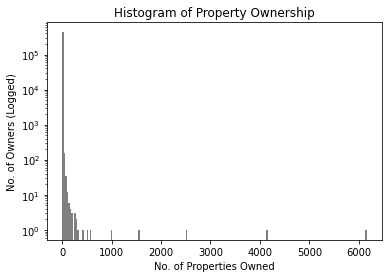

In [13]:
histogram('./data_sets/landlords_and_properties.json', 200)

### Housing Justice Node JSON Generator
This generator will create all the files necessary for the front-end of this project.

In [9]:
def housing_justice_node_json_generator():
    print('Creating landlords_and_properties.json...')
    json_creator('opa_properties_public.csv', 'landlords_and_properties.json')
    print('Creating properties.json...')
    property_json_creator('opa_properties_public.csv', 'properties.json')
    print('Creating landlords.json...')
    landlord_json_creator('opa_properties_public.csv', 'landlords.json')


In [ ]:
housing_justice_node_json_generator()

### Significant Landlords Generator
This functions modifies a JSON file to contain ornly landlords and properties higher than `significant_property_count`.

In [6]:
def significant_landlords_generator(source, output, significant_property_count):
    with open(source, mode='r') as file:
        data = file.read()
    landlords_and_properties = json.loads(data)
    landlord_count = len(landlords_and_properties)
    significant_landlords = []
    for landlord in tqdm(landlords_and_properties, total=landlord_count):
        if landlord[1] >= significant_property_count:
            significant_landlords.append(landlord)
    print('Significance Threshold: ', significant_property_count, 'Properties Owned')
    print('Significant Landlords: ', len(significant_landlords))
    with open(output, 'w') as file:
            file.write(json.dumps(significant_landlords))

In [7]:
significant_landlords_generator('./data_sets/sorted_landlords.json', './data_sets/significant_sorted_landlords.json', 50)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 429983/429983 [00:00<00:00, 4622682.33it/s]

Significance Threshold:  50 Properties Owned
Significant Landlords:  23


### How Many Landlords
This function provides how many landlords there are in a JSON file.

In [11]:
def how_many_landlords(source):
    with open(source, mode='r') as file:
        data = file.read()
    landlords = json.loads(data)
    landlord_count = len(landlords)
    print("There are ", landlord_count, "in this dataset.")

In [12]:
how_many_landlords('./data_sets/unique_landlords.json')

There are  429983 in this dataset.


### Landlord Stats
A work in progress

In [13]:
# def landlord_stats(source, output):
#     with open(source, mode='r') as file:
#         data = file.read()
#     landlords_and_properties = json.loads(data)
#     landlord_count = len(landlords_and_properties)
#     landlords = {}
#     for landlord in tqdm(landlords_and_properties, total=landlord_count):
#         properties = landlords_and_properties[landlord]['properties']
#         property_ages = []
#         unknown_age_count = 0
#         has_age_estimates = False
#         sale_prices = []
#         num_dollar_props = 0
#         purchase_years = []
#         for property in tqdm(properties, len(properties)):
#             # average property age
#             if property['year_built'] == '0000':
#                 unknown_age_count += 1
#             else:
#                 if (property['year_built_estimate'] == 'Y'):
#                     has_age_estimates = True
#                 try:
#                     int_year = int(property['year_built'])
#                     property_ages.append(int_year)
#                 except:
#                     print('Uhhh what the year didn\'t int.')
#                     print(landlord)
#
#             # average sale price
#             if property['sale_price'] == '1.0':
#                 num_dollar_props += 1
#             else:
#                 try:
#                     float_price = float(property['sale_price'])
#                     sale_prices.append(float_price)
#                 except:
#                     print('Uhhh what the sale price didn\'t float.')
#                     print(landlord)
#                     print('\n')
#  @TODO finish this function